# Non-linear Regression Models

In [2]:
import pandas as pd
import numpy as np
import time
from sklearn import preprocessing
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("./data/auto-mpg.csv", index_col="car name", na_values="?")
data = data.dropna()
print(data.shape)
factors = ['cylinders','displacement','horsepower','acceleration','weight','origin','model year']
X = pd.DataFrame(data[factors].copy())
y = data['mpg'].copy()

(392, 8)


In [4]:
X = preprocessing.StandardScaler().fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=23)

## Decision Tree

In [6]:
reg = tree.DecisionTreeRegressor(max_features='auto')
reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [7]:
y_pred = reg.predict(X_test)
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print('RMSE of decision tree is {:.3f}'.format(rmse))

RMSE of decision tree is 4.480


In [8]:
r = tree.export.export_text(reg.fit(X_train, y_train), feature_names=factors)
print(r)

|--- displacement <= -0.04
|   |--- horsepower <= -0.78
|   |   |--- model year <= 0.41
|   |   |   |--- displacement <= -1.02
|   |   |   |   |--- model year <= 0.14
|   |   |   |   |   |--- weight <= -1.59
|   |   |   |   |   |   |--- value: [35.00]
|   |   |   |   |   |--- weight >  -1.59
|   |   |   |   |   |   |--- horsepower <= -1.25
|   |   |   |   |   |   |   |--- acceleration <= 0.89
|   |   |   |   |   |   |   |   |--- value: [31.00]
|   |   |   |   |   |   |   |--- acceleration >  0.89
|   |   |   |   |   |   |   |   |--- value: [29.00]
|   |   |   |   |   |   |--- horsepower >  -1.25
|   |   |   |   |   |   |   |--- displacement <= -1.09
|   |   |   |   |   |   |   |   |--- acceleration <= 1.62
|   |   |   |   |   |   |   |   |   |--- value: [31.00]
|   |   |   |   |   |   |   |   |--- acceleration >  1.62
|   |   |   |   |   |   |   |   |   |--- value: [32.00]
|   |   |   |   |   |   |   |--- displacement >  -1.09
|   |   |   |   |   |   |   |   |--- value: [32.00]
|   |  

## Gradient Boosting model

In [9]:
reg = ensemble.GradientBoostingRegressor(n_estimators=100)
reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
y_pred = reg.predict(X_test)
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print('RMSE of GBM is {:.3f}'.format(rmse))

RMSE of GBM is 2.600


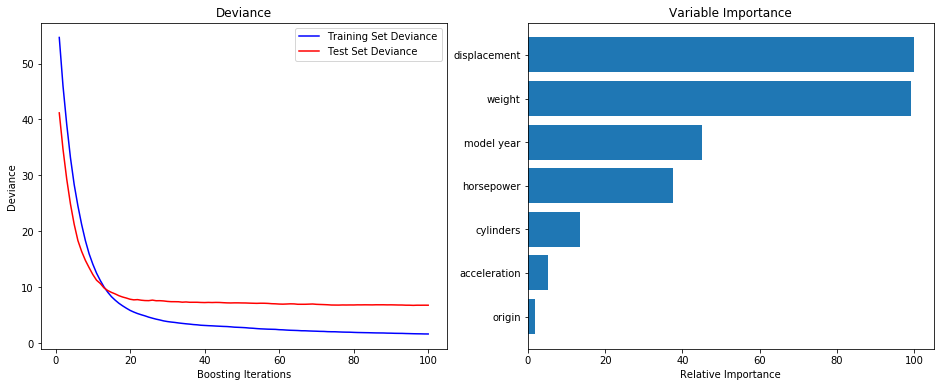

In [11]:
# compute test set deviance
test_score = np.zeros((100,), dtype=np.float64)

for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(100) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(100) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

feature_importance = reg.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.asarray(factors)[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Random Forest Regressor

In [12]:
reg = ensemble.RandomForestRegressor(max_depth=None, random_state=0, n_estimators=100, verbose=1)
reg.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=1,
                      warm_start=False)

In [13]:
reg.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 1,
 'warm_start': False}

In [14]:
y_pred = reg.predict(X_test)
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print('RMSE of random forest is {:.3f}'.format(rmse))

RMSE of random forest is 2.641


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


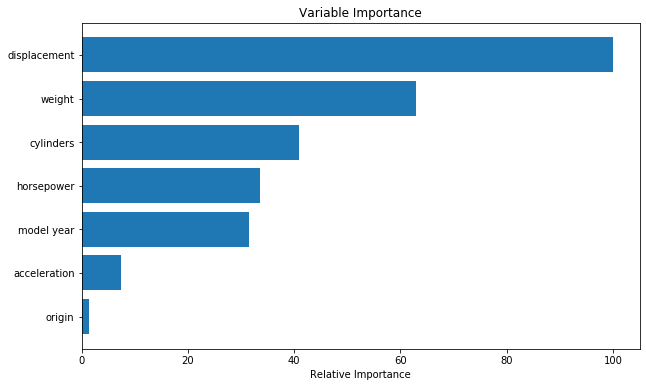

In [16]:
plt.figure(figsize=(10, 6))
feature_importance = reg.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.asarray(factors)[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()